Предварительно про PyTorch:
* [Про тензоры в pytorch](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/tensor_tutorial.ipynb)
* [Про автоматическое дифференцирование и что такое .backwards()](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/autograd_tutorial.ipynb)
* [Очень простая нейронка на pytorch](https://colab.research.google.com/drive/1RsZvw4KBGn5U5Aj5Ak7OG2pHx6z1OSlF)

## Код ноутбука с занятия оставляю, домашнее задание по теме "Классификация в NLP" будет после лекционного материала

# Классификация текстов

## Fakenews

1. Мы будем работать с данными fakenews отсюда: https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv
2. Проведите препроцессинг текста. Разбейте данные на train и test для задачи классификации.
3. Векторизуйте.
4. Обучите на полученных векторах алгоритм классификации.

Мы уже видели как эта задача выполняется с помощью Word2vec. Давайте вспомним.

In [1]:
!wget https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv

--2021-11-23 20:30:17--  https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1253562 (1.2M) [text/plain]
Saving to: ‘Constraint_Train.csv.3’

Constraint_Train.cs 100%[===================>]   1.20M  --.-KB/s    in 0.02s   

2021-11-23 20:30:17 (52.0 MB/s) - ‘Constraint_Train.csv.3’ saved [1253562/1253562]



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Constraint_Train.csv')

In [3]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [5]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [6]:
import seaborn as sns 

Text(0.5, 1.0, 'fake/real news distribution')

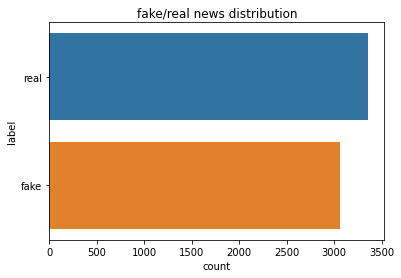

In [8]:
sns.countplot(data=df, y='label').set_title('fake/real news distribution')

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Polina.DESKTOP-
[nltk_data]     UGBOPLJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
sentences = [word_tokenize(text.lower()) for text in tqdm(df.tweet)]

100%|████████████████████████████████████████████████████████████████████████████| 6420/6420 [00:02<00:00, 2179.50it/s]


In [9]:
from gensim.models.word2vec import Word2Vec
# %time model_tweets = Word2Vec(sentences, workers=4, size=300, min_count=3, window=5, iter=30)
model_tweets = Word2Vec(sentences, workers=4, vector_size=300, min_count=3, window=5)

In [14]:
model_tweets.wv.most_similar('france')

[('research', 0.996173083782196),
 ('white', 0.9961590766906738),
 ('ahead', 0.9951794147491455),
 ('protection', 0.9949883818626404),
 ('suicide', 0.9945024847984314),
 ('house', 0.9942063689231873),
 ('demand', 0.9941803216934204),
 ('lanka', 0.9941743016242981),
 ('front', 0.9940750598907471),
 ('moment', 0.9938743114471436)]

In [15]:
model_tweets.init_sims()

<ipython-input-15-f1a8336e4a1e>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_tweets.init_sims()


In [10]:
import numpy as np

In [17]:
def get_text_embedding(text):
    result = []
    for word in word_tokenize(text.lower()):
        if word in model_tweets.wv:
            result.append(model_tweets.wv[word])

    if len(result):
        result = np.sum(result, axis=0)
    else:
        result = np.zeros(300)
    return result

In [16]:
features = [get_text_embedding(text) for text in tqdm(df.tweet)]

100%|██████████| 6420/6420 [00:03<00:00, 1976.39it/s]


In [17]:
len(features)

6420

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, df.label, test_size=0.33)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [12]:
from sklearn.metrics import classification_report

In [22]:
predicted = model.predict(X_test)

In [23]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

        fake       0.92      0.92      0.92      1033
        real       0.93      0.92      0.92      1086

    accuracy                           0.92      2119
   macro avg       0.92      0.92      0.92      2119
weighted avg       0.92      0.92      0.92      2119



###  Что будет, если использовать самый наивный метод?

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vec = CountVectorizer()

In [26]:
bow = vec.fit_transform(df.tweet)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(bow, df.label, test_size=0.33)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

        fake       0.93      0.93      0.93      1018
        real       0.93      0.93      0.93      1101

    accuracy                           0.93      2119
   macro avg       0.93      0.93      0.93      2119
weighted avg       0.93      0.93      0.93      2119



Конечно, мы всегда можем поиграться с предобработкой.

### PyTorch + LSTM

In [29]:
labels = (df.label == 'real').astype(int).to_list()

Нужно заранее задать размер для макксимальной длины предложений.

In [30]:
token_lists = [word_tokenize(text.lower()) for text in df.tweet]
max_len = len(max(token_lists, key=len))

In [31]:
max_len

1592

Это слишком много. Но какая длина обычно?

In [14]:
from collections import Counter
fd = Counter([len(tokens) for tokens in token_lists])

In [33]:
fd.most_common(10)

[(20, 179),
 (25, 174),
 (22, 170),
 (18, 170),
 (19, 167),
 (21, 167),
 (16, 162),
 (15, 161),
 (17, 161),
 (23, 157)]

Зададим максимум 200.

Возьмём те же w2v эмбеддинги.

In [34]:
def get_word_embedding(tokens, max_len):
    result = []
    for i in range(max_len):
        if i < len(tokens):
            word = tokens[i]
            if word in model_tweets.wv:
                result.append(model_tweets.wv[word])
            else:
                result.append(np.zeros(300))
        else:
            result.append(np.zeros(300))
    return result

In [35]:
features = [get_word_embedding(text, 200) for text in tqdm(token_lists)]

100%|██████████| 6420/6420 [00:03<00:00, 1717.66it/s]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33)

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

In [38]:
len(features[0][0])

300

In [39]:
len(X_train)

4301

In [40]:
len(X_train[0])

200

In [41]:
len(X_train[0][0])

300

In [42]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.lstm = nn.LSTM(300, 100)
        self.out = nn.Linear(100, 1)

    def forward(self, x):
        embeddings, (shortterm, longterm) = self.lstm(x.transpose(0, 1))
        prediction = torch.sigmoid(self.out(longterm))
        return prediction


net = Net()
print(net)

Net(
  (lstm): LSTM(300, 100)
  (out): Linear(in_features=100, out_features=1, bias=True)
)


In [43]:
in_data = torch.tensor(X_train).float()
targets = torch.tensor(y_train).float()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  """Entry point for launching an IPython kernel.


In [44]:
in_data.shape

torch.Size([4301, 200, 300])

In [45]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [46]:
def train_one_epoch(in_data, targets, batch_size=16):
    for i in tqdm(range(0, in_data.shape[0], batch_size)):
        batch_x = in_data[i:i + batch_size]
        batch_y = targets[i:i + batch_size]
        optimizer.zero_grad()
        output = net(batch_x)
        loss = criterion(output.reshape(-1), batch_y)
        loss.backward()
        optimizer.step()
    print(loss)

In [47]:
train_one_epoch(in_data, targets)

100%|██████████| 269/269 [03:15<00:00,  1.38it/s]

tensor(0.6967, grad_fn=<BinaryCrossEntropyBackward0>)


Что получилось?

In [48]:
in_data_test = torch.tensor(X_test).float()
targets_test = torch.tensor(y_test).float()

In [49]:
with torch.no_grad():
    output = net(in_data_test).reshape(-1)

In [50]:
result = (output > 0.5) == targets_test

In [51]:
result.sum().item() / len(result)

0.5186408683341198

Но такую модель надо учить дольше(

# Домашнее задание к лекции "Классификация в NLP"

Используя ноутбук занятия (также размещен в папке Materials) и данные fakenews, 3 раза разными способами получить на задаче классификации значение f1 выше 0.91 для методов на sklearn и выше 0.52 для методов на pytorch.

#### 1. Sklearn

В начале попробую оставить предобработку данных такую, какая была для классической логистической регрессии, но применить другие классификаторы из sklearn

Text(0.5, 1.0, 'fake/real news distribution')

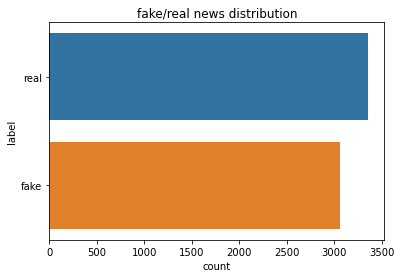

In [15]:
sns.countplot(data=df, y='label').set_title('fake/real news distribution')

Распределение классов относительно равномерное, проводить перебалансировку классов нет необходимости

In [21]:
features = [get_text_embedding(text) for text in df.tweet]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, df.label, test_size=0.33)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

In [24]:
classifiers = {
    'tree': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(), 
    'knc': KNeighborsClassifier(n_neighbors=10),
    'svc': SVC(),
    'gpc': GaussianProcessClassifier()
}

In [57]:
for label, model in classifiers.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{label} result')
    print(classification_report(y_pred, y_test))
    print('------------------------')

tree result
              precision    recall  f1-score   support

        fake       0.89      0.88      0.88      1012
        real       0.89      0.90      0.90      1107

    accuracy                           0.89      2119
   macro avg       0.89      0.89      0.89      2119
weighted avg       0.89      0.89      0.89      2119

------------------------
rfc result
              precision    recall  f1-score   support

        fake       0.92      0.93      0.93       989
        real       0.94      0.93      0.93      1130

    accuracy                           0.93      2119
   macro avg       0.93      0.93      0.93      2119
weighted avg       0.93      0.93      0.93      2119

------------------------
knc result
              precision    recall  f1-score   support

        fake       0.95      0.89      0.92      1068
        real       0.90      0.96      0.93      1051

    accuracy                           0.92      2119
   macro avg       0.93      0.92      0.92 

Три классификатора из пяти выдали f1-score, выше необходимого порога. Посмотрим, получится ли поднять f1-score, если изменить гиперпараметры. Возьму модель SVC, как модель с наибольшей accuracy 

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10]
}

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
grid_svc = GridSearchCV(SVC(), param_grid=params, scoring='f1')

In [35]:
grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='f1')

In [36]:
best_svc = grid_svc.best_estimator_

In [37]:
grid_svc.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [38]:
best_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [39]:
y_pred = best_svc.predict(x_test)
print(classification_report(y_pred, y_test))
print('------------------------')

              precision    recall  f1-score   support

        fake       0.92      0.88      0.90       779
        real       0.89      0.93      0.91       826

    accuracy                           0.91      1605
   macro avg       0.91      0.91      0.91      1605
weighted avg       0.91      0.91      0.91      1605

------------------------


Результат SVC не был улучшен, но f1-score по-прежнему выше заданного порога

### TF-IDF + TruncatedSVD

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [27]:
vectors = TfidfVectorizer().fit_transform(df.tweet)

In [28]:
vectors.shape

(6420, 18385)

In [29]:
n_features = [20, 50, 80, 200, 500, 1000]

In [30]:
# Посмотрим на результат в зависимости от возможного количества фич 
for n in n_features:
    X_reduced = TruncatedSVD(n_components=n, random_state=0).fit_transform(vectors)
    x_train, x_test, y_train, y_test = train_test_split(X_reduced, df.label)
    clf = LogisticRegression(random_state=146, solver='liblinear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    print(f'truncatedSVD components: {n}')
    print(classification_report(y_pred, y_test))
    print('---------------------------')

truncatedSVD components: 20
              precision    recall  f1-score   support

        fake       0.88      0.85      0.87       801
        real       0.86      0.89      0.87       804

    accuracy                           0.87      1605
   macro avg       0.87      0.87      0.87      1605
weighted avg       0.87      0.87      0.87      1605

---------------------------
truncatedSVD components: 50
              precision    recall  f1-score   support

        fake       0.89      0.88      0.89       804
        real       0.88      0.89      0.89       801

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605

---------------------------
truncatedSVD components: 80
              precision    recall  f1-score   support

        fake       0.89      0.89      0.89       778
        real       0.90      0.89      0.90       827

    accuracy                           0.8

для количества компонентов >= 200  получаем необходимый f1-score 

### PyTorch: полносвязная нейросеть 

In [152]:
pip install pymorphy2

In [26]:
from string import punctuation
from nltk.corpus import stopwords
import re
import pymorphy2

In [27]:
morph = pymorphy2.MorphAnalyzer()

In [28]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to C:\Users\Polina.DESKTOP-
[nltk_data]     UGBOPLJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stops = stopwords.words('english')+[char for char in punctuation]

In [30]:

en_words = re.compile("[A-Za-z]+")


def words_only(text):
    return " ".join(en_words.findall(text))


def lemmatize(text, mystem=morph):
    try:
        words = text.split() # разбиваем текст на слова
        res = list()
        for word in words:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        return " ".join(res).strip() 
    except:
        return " "


def remove_stopwords(text, mystopwords = stops):
    try:
        return " ".join([token for token in text.split() if not token in stops])
    except:
        return ""

    
def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [31]:
df['tweet_cleaned'] = df['tweet'].apply(preprocess)

In [159]:
# df = pd.read_csv('/content/df_fakenews_preprocessed.csv')

In [160]:
# df = df.drop('Unnamed: 0', axis=1)

In [161]:
# df.head()

In [32]:
df.label = df.label.map({'real':1, 'fake':0})
df.head()

,id,tweet,label,tweet_cleaned
0,1,The CDC currently reports 99031 deaths. In gen...,1,cdc currently reports deaths general discrepan...
1,2,States reported 1121 deaths a small rise from ...,1,states reported deaths small rise last tuesday...
2,3,Politically Correct Woman (Almost) Uses Pandem...,0,politically correct woman almost uses pandemic...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1,indiafightscorona covid testing laboratories i...
4,5,Populous states can generate large case counts...,1,populous states generate large case counts loo...


In [163]:
df.to_csv('df_fakenews_preprocessed.csv')

In [33]:
vectorizer_text = CountVectorizer(max_features=4000)
text_matrix = vectorizer_text.fit_transform(df.tweet_cleaned).toarray()

In [34]:
text_matrix.shape

(6420, 4000)

In [35]:
X = text_matrix
Y = df.label

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,np.array(Y),test_size=0.33,random_state=1)

In [168]:
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__() 
        
        self.linear1 = nn.Linear(4000,2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000,500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500,100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100,20) 
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20,2) 
        
    
    def forward(self,x):
        
        out = self.linear1(x) 
        out = self.relu1(out)
        
        out = self.linear2(out) 
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)  
        out = self.relu4(out)

        out = self.linear5(out) 
        
        return out
    



In [169]:
model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [170]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4301, 4000)
(2119, 4000)
(4301,)
(2119,)


In [171]:
x_train = torch.Tensor(x_train).float()
y_train = torch.Tensor(y_train).type(torch.LongTensor)
# y_train = torch.Tensor(y_train).float()

x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)


EPOCHS = 20

for epoch in range(EPOCHS):
    
    optimizer.zero_grad()
    
    outs = model(x_train)
    
    loss = error(outs,y_train)
    
    loss.backward()
    
    optimizer.step()

    print(f"Loss after iteration {epoch} is {loss}")
    

Loss after iteration 0 is 0.6982213258743286
Loss after iteration 1 is 0.6047581434249878
Loss after iteration 2 is 0.7546039819717407
Loss after iteration 3 is 0.388247549533844
Loss after iteration 4 is 0.4566524028778076
Loss after iteration 5 is 0.4190983176231384
Loss after iteration 6 is 0.3315938711166382
Loss after iteration 7 is 0.23581743240356445
Loss after iteration 8 is 0.13586340844631195
Loss after iteration 9 is 0.06271281838417053
Loss after iteration 10 is 0.036571402102708817
Loss after iteration 11 is 0.023890409618616104
Loss after iteration 12 is 0.01668655313551426
Loss after iteration 13 is 0.010778089053928852
Loss after iteration 14 is 0.005265349987894297
Loss after iteration 15 is 0.0036049869377166033
Loss after iteration 16 is 0.0035705578047782183
Loss after iteration 17 is 0.0031587216071784496
Loss after iteration 18 is 0.0020256461575627327
Loss after iteration 19 is 0.00036802442627958953


In [37]:
from sklearn.metrics import accuracy_score

In [173]:

y_head = model(x_test)
print(y_head[0])

y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,y_test))

tensor([ 13.1919, -26.6552], grad_fn=<SelectBackward0>)
tensor(0)
Model accuracy is  0.9056158565361019


In [174]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       926
           1       0.95      0.88      0.91      1193

    accuracy                           0.91      2119
   macro avg       0.90      0.91      0.91      2119
weighted avg       0.91      0.91      0.91      2119



В результате обучения полносвязной сети получили достаточно высокий f1-score

### PyTorch + LSTM

In [38]:
sentences = [word_tokenize(text.lower()) for text in df.tweet_cleaned]
model_tweets_cleaned = model_tweets = Word2Vec(sentences, workers=4, vector_size=300, min_count=3, window=5)

In [39]:
def get_word_embedding(tokens, max_len):
    result = []
    for i in range(max_len):
        if i < len(tokens):
            word = tokens[i]
            if word in model_tweets.wv:
                result.append(model_tweets.wv[word])
            else:
                result.append(np.zeros(300))
        else:
            result.append(np.zeros(300))
    return result

In [40]:
features = [get_word_embedding(text, 200) for text in [word_tokenize(text) for text in df.tweet_cleaned]]

In [41]:
len(features[0][0])

300

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, df.label, test_size=0.33)

In [43]:
len(x_train[0][0])

300

Попробую создать модель, аналогичную модели с занятия, но добавить в неё полносвязный слой после слоя lstm. Так же хочу попробовать отдельно сделать модель с двунаправленным слоем lstm

In [46]:
class LSTM_model(nn.Module):
    def __init__(self, embedding_size=300, hidden_size=100):
        super(LSTM_model, self).__init__()
        self.lstm = nn.LSTM(300, hidden_size)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):

        embeddings, (shortterm, longterm) = self.lstm(x.transpose(0, 1))
        out = longterm.transpose(0,1)
        out = out.flatten(start_dim=1)
        out = self.fc(out)
        prediction = self.sigmoid(out).flatten()
        return prediction

In [47]:
lstm = LSTM_model()
print(lstm)

LSTM_model(
  (lstm): LSTM(300, 100)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [48]:
x_train = torch.tensor(x_train).float()
# y_train = torch.tensor(y_train).float()

In [49]:
targets = torch.tensor(y_train.values).float()

In [50]:
optimizer = optim.Adam(lstm.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [51]:
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test.values)


In [52]:
def train_one_epoch(epoch, model, in_data, targets, batch_size=16):
    for i in tqdm(range(0, in_data.shape[0], batch_size)):
        batch_x = in_data[i:i + batch_size]
        batch_y = targets[i:i + batch_size]
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output.reshape(-1), batch_y)
        loss.backward()
        optimizer.step()
    print(f"Loss after iteration {epoch} is {loss}")

In [53]:
EPOCHS = 20

for epoch in range(EPOCHS):
    train_one_epoch(epoch, lstm, x_train, targets)

  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 0 is 0.6902531385421753


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 1 is 0.6901988983154297


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 2 is 0.6901856660842896


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 3 is 0.6901884078979492


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 4 is 0.6902033686637878


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 5 is 0.6902069449424744


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 6 is 0.6902220845222473


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 7 is 0.6902374029159546


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 8 is 0.690243661403656


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 9 is 0.690234899520874


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 10 is 0.6902836561203003


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 11 is 0.6902669072151184


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 12 is 0.6902567148208618


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 13 is 0.6902906894683838


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 14 is 0.6902705430984497


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 15 is 0.6902891993522644


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 16 is 0.6902964115142822


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 17 is 0.6902846097946167


  0%|                                                                                          | 0/269 [00:00<?, ?it/s]

Loss after iteration 18 is 0.6902912855148315


100%|████████████████████████████████████████████████████████████████████████████████| 269/269 [01:31<00:00,  2.94it/s]

Loss after iteration 19 is 0.6903019547462463


In [54]:
with torch.no_grad():
    output = lstm(x_test).reshape(-1)

In [55]:
output[0]

tensor(0.5306)

In [56]:
y_pred = (np.array(output).flatten() > 0.5).astype(np.int)

In [57]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         2
           1       1.00      0.52      0.68      2117

    accuracy                           0.52      2119
   macro avg       0.50      0.76      0.34      2119
weighted avg       1.00      0.52      0.68      2119



In [58]:
class biLSTM_model(nn.Module):
    def __init__(self, embedding_size=300, hidden_size=100):
        super(biLSTM_model, self).__init__()
        self.lstm = nn.LSTM(300, hidden_size, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embeddings, (shortterm, longterm) = self.lstm(x.transpose(0, 1))
        out = longterm.transpose(0,1)
        out = out.flatten(start_dim=1)
        out = self.fc(out)
        prediction = self.sigmoid(out).flatten()
        return prediction

In [59]:
bilstm = biLSTM_model()
print(bilstm)

biLSTM_model(
  (lstm): LSTM(300, 100, bidirectional=True)
  (fc): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [60]:
EPOCHS = 20

for epoch in range(EPOCHS):
    train_one_epoch(epoch, bilstm, x_train, targets, 32)

  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 0 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 1 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 2 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 3 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 4 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 5 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 6 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 7 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 8 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 9 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 10 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 11 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 12 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 13 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 14 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 15 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 16 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 17 is 0.6876842975616455


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]

Loss after iteration 18 is 0.6876842975616455


100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [02:19<00:00,  1.03s/it]

Loss after iteration 19 is 0.6876842975616455


In [61]:
with torch.no_grad():
    output = bilstm(x_test).reshape(-1)

In [62]:
y_pred = (np.array(output).flatten() > 0.5).astype(np.int)

In [63]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      1323
           1       0.54      0.74      0.62       796

    accuracy                           0.66      2119
   macro avg       0.67      0.68      0.66      2119
weighted avg       0.70      0.66      0.67      2119



Сетки с lstm-слоем показали меньшую точность, чем полносвязная нейронка, но набрали необходимый f-score 